In [1]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [2]:
import os

import os, sys
dirPath = os.path.dirname(os.path.realpath("__file__"))
packagesPath = os.path.abspath(os.path.join(dirPath, '../../', 'packages'))
print("Package path:", packagesPath)
dataPath = os.path.abspath(os.path.join(dirPath, '../../', 'data'))
print("Data path:", dataPath)
outputPath = os.path.abspath(os.path.join(dirPath, '../../', 'output'))
print("Output path:", outputPath)

if not packagesPath in sys.path:
    sys.path.append(packagesPath)

Package path: /notebooks/packages
Data path: /notebooks/data
Output path: /notebooks/output


In [3]:
# Create state dictionary

import text_generator.markov as markov
import glob

train = True
#datasetPath =  os.path.abspath(os.path.join(dataPath, "Data-Obama/*.*"))
datasetPath =  os.path.abspath(os.path.join(dataPath, "Newsroom/2_content.txt"))

print(datasetPath)
keyLen = 3
fileList = []
#dictionaryFilePath = os.path.abspath(os.path.join(outputPath, "data_obama.txt"))
dictionaryFilePath = os.path.abspath(os.path.join(outputPath, "newsroom.txt"))
print(dictionaryFilePath)
if train :
    fileList += glob.glob(datasetPath)
    print("Input files")
    print(fileList)
    markovObj = markov.Markov(keyLen)


    for file in fileList:
        print(file)
        try:
            markovObj.readFile(file, "utf-8")
        except:
            markovObj.readFile(file, "windows-1252")

    markovObj.outputDict(dictionaryFilePath)

    print( "Generated Markov dictionary %s with processing %s input lines and %s input words " % ( dictionaryFilePath, str(markovObj.getLineCount()), str(markovObj.getWordCount()) ) )


/notebooks/data/Newsroom/2_content.txt
/notebooks/output/newsroom.txt
Input files
['/notebooks/data/Newsroom/2_content.txt']
/notebooks/data/Newsroom/2_content.txt
Generated Markov dictionary /notebooks/output/newsroom.txt with processing 18 input lines and 593 input words 


In [4]:
maxWordInSentence = 50
genNSentences = 2
outputText = []


markovObj1 = markov.Markov(dictFile=dictionaryFilePath, maxWordInSentence= maxWordInSentence)

for _ in range( genNSentences ):
    text = markovObj1.genText() 
    #print( text )
    if len(text) <= 140 and text.endswith('.'):
        outputText.append(text)

print("\n\n")
print(outputText)

Loaded dictionary file: /notebooks/output/newsroom.txt



[]


In [5]:
import lc

fileContent = ''
with open(datasetPath, "r", encoding='utf-8') as file:
    fileContent = " ".join(file)
    


----------------------
Total local vocab:  159
Filtered local vocab:  159
----------------------
Total local vocab:  56
Filtered local vocab:  56
After saving


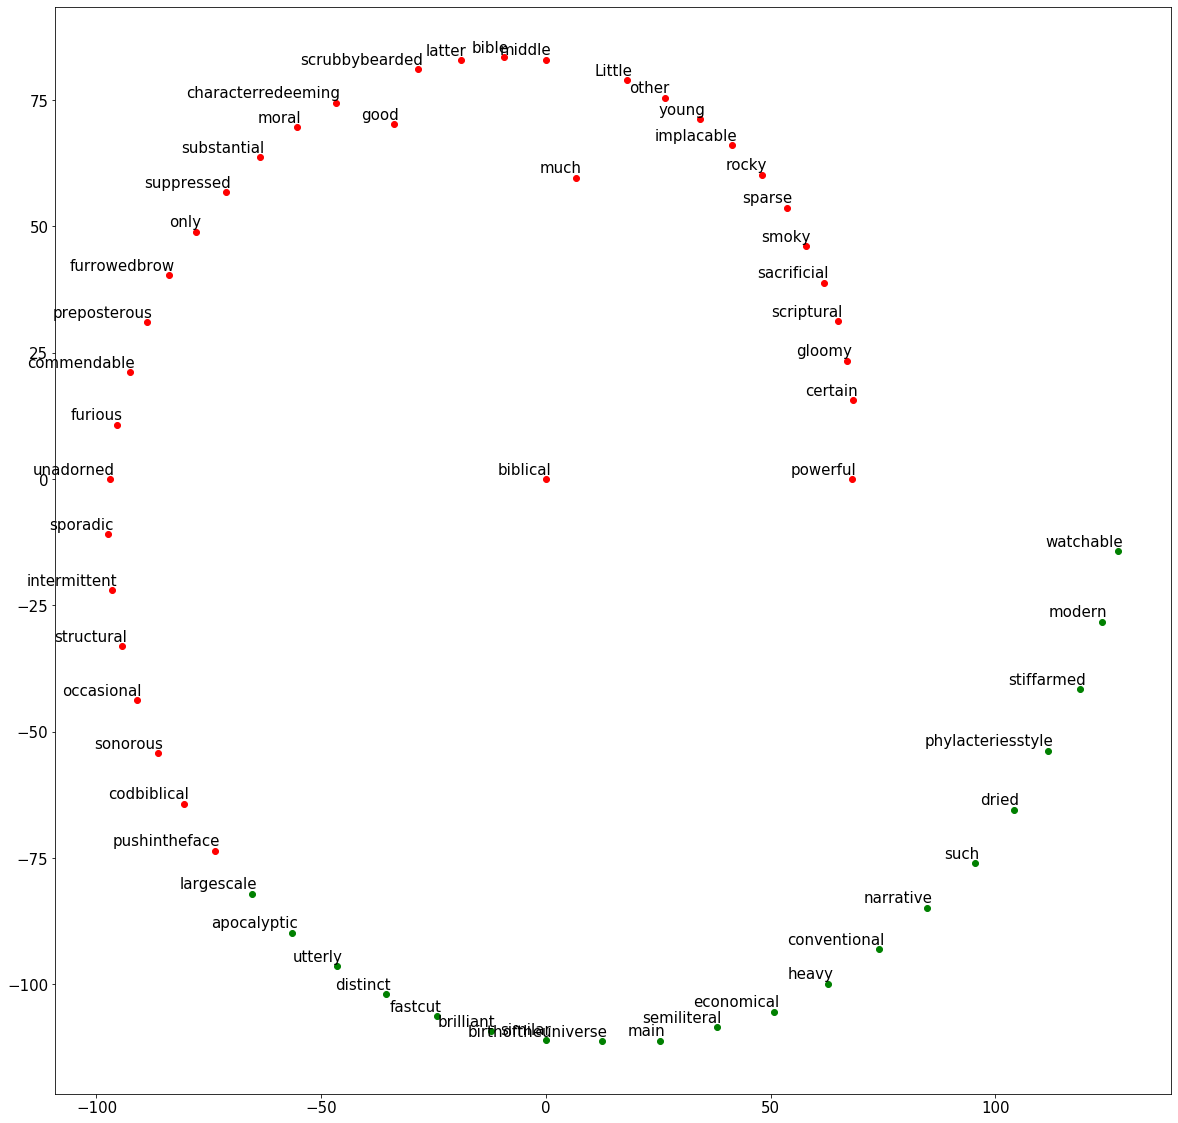

----------------------
Total local vocab:  56
Filtered local vocab:  56
['power', 'biblic', 'certain', 'gloomi', 'scriptur', 'sacrifici', 'smoki', 'spars', 'rocki', 'implac', 'young', 'other', 'littl', 'much', 'middl', 'bibl', 'latter', 'scrubbybeard', 'good', 'characterredeem', 'moral', 'substanti', 'suppress', 'onli', 'furrowedbrow', 'preposter', 'commend', 'furiou', 'unadorn', 'sporad', 'intermitt', 'structur', 'occasion', 'sonor', 'codbibl', 'pushinthefac']


In [27]:
#allowedTypes = ['NN', 'NNP', 'NNS', 'NNPS']
#allowedTypes = ['NN', 'NNS']
#allowedTypes = ['NNP', 'NNPS']
#allowedTypes = ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']
allowedTypes = ['JJ', 'JJR', 'JJS']
#allowedTypes = ['RB', 'RBR', 'RBS']
#allowedTypes = ["CC","CD","DT","EX","FW","IN","JJ","JJR","JJS","LS","MD","NN","NNS","NNP","NNPS","PDT","POS","PRP","PRP$","RB","RBR","RBS","RP","SYM","TO","UH","VB","VBD","VBG","VBN","VBP","VBZ","WDT","WP","WP$","WRB"]
#otherTypes = set(allAllowedTypes) - set(allowedTypes)
#print(otherTypes)
#allowedTypes = ['NN', 'NNP', 'NNS', 'NNPS', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'JJ', 'JJR', 'JJS', 'RB', 'RBR', 'RBS']
peripheralProcessor = lc.Peripheral(fileContent)
peripheralProcessor.setAllowedPosTypes(allowedTypes)
peripheralProcessor.setPositionContributingFactor(1)
peripheralProcessor.setOccuranceContributingFactor(1)
peripheralProcessor.setProperNounContributingFactor(1)
peripheralProcessor.setTopScorePercentage(0.2)
peripheralProcessor.setFilterWords(0)
peripheralProcessor.loadSentences(fileContent)
peripheralProcessor.loadFilteredWords()
peripheralProcessor.train()
#print(peripheralProcessor.getPoints())
peripheralProcessor.displayPlot(outputPath + '/newsroom-peripheral.png')

filteredWords = peripheralProcessor.loadFilteredWords()
contributors  = peripheralProcessor.getContrinutors()

print(contributors)


#Brexit: Labour MPs in 'show us the money' row.
#Brexit: UK plans new product safety mark for 'no deal' scenario

In [7]:
import text_generator.cwr as cwr

cwrTextProcessor = cwr.CWR(order=3, dictFile=dictionaryFilePath, maxWordInSentence= maxWordInSentence)
cwrTextProcessor.setContributors(contributors)
titles = cwrTextProcessor.getTitles()
print(len(titles))
print(titles)

order:  3
Loaded dictionary file: /notebooks/output/newsroom.txt
2
['He also injects some of his utterly distinct fast-cut "hip hop" sequences', 'There are plenty of good inventions along the way – such as the anaesthetising of the animals in the ark']


In [8]:
from nltk.parse.generate import generate, demo_grammar

In [9]:
from nltk import CFG

In [10]:
grammar = CFG.fromstring(demo_grammar)

In [11]:
print(grammar)

Grammar with 13 productions (start state = S)
    S -> NP VP
    NP -> Det N
    PP -> P NP
    VP -> 'slept'
    VP -> 'saw' NP
    VP -> 'walked' PP
    Det -> 'the'
    Det -> 'a'
    N -> 'man'
    N -> 'park'
    N -> 'dog'
    P -> 'in'
    P -> 'with'


In [12]:
for sentence in generate(grammar, n=10):
    print(' '.join(sentence))

the man slept
the man saw the man
the man saw the park
the man saw the dog
the man saw a man
the man saw a park
the man saw a dog
the man walked in the man
the man walked in the park
the man walked in the dog


In [13]:
grammar = nltk.CFG.fromstring("""
 S -> NP VP
 VP -> V NP | V NP PP
 V -> "saw" | "ate"
 NP -> "John" | "Mary" | "Bob" | Det N | Det N PP
 Det -> "a" | "an" | "the" | "my"
 N -> "dog" | "cat" | "cookie" | "park"
 PP -> P NP
 P -> "in" | "on" | "by" | "with"
 """)

for sentence in generate(grammar, n=10):
    print(' '.join(sentence))

John saw John
John saw Mary
John saw Bob
John saw a dog
John saw a cat
John saw a cookie
John saw a park
John saw an dog
John saw an cat
John saw an cookie


In [14]:
!pip3 install rouge

In [15]:
from rouge import Rouge

hypothesis = "A 5-year-old boy under observation in a New York hospital over concerns he had Ebola has tested negative for the disease"

reference = "Darren Aronofsky has created an epic and stylish adaptation of the biblical flood story, but doesn't quite overcome the traditional difficulties of the genre"

rouge = Rouge()
scores = rouge.get_scores(hypothesis, reference)

print(scores)
print('Finished')

[{'rouge-1': {'f': 0.0952380902380955, 'p': 0.09523809523809523, 'r': 0.09523809523809523}, 'rouge-2': {'f': 0.0, 'p': 0.0, 'r': 0.0}, 'rouge-l': {'f': 0.09523809523759523, 'p': 0.09523809523809523, 'r': 0.09523809523809523}}]
Finished
